In [2]:
#We first import the libraries
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [3]:
#Loading the data with normalization
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])


train_set = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

In [4]:
#Building the neural network model
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self): 
        super(Model, self).__init__()

        self.fc1 = nn.Linear(28 * 28, 1024) #First layer
        self.dropout1 = nn.Dropout(p = 0.2) #First layer dropout
        self.fc2 = nn.Linear(1024, 243) #Second layer
        self.dropout2 = nn.Dropout(p = 0.5)#Second layer dropout
        self.fc3 = nn.Linear(243, 10) #Third layer

    def forward(self, x):
        x = x.view(-1, 28 * 28)

        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

#Check the model
model = Model()
print(model)

Model(
  (fc1): Linear(in_features=784, out_features=1024, bias=True)
  (dropout1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=1024, out_features=243, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=243, out_features=10, bias=True)
)


In [5]:
from torch.optim import SGD
#Load the optimizer and the criterion

criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.003)
losses_train = []
losses_valid = []


In [6]:
# Implementing early stoping to maximize the time efficiency and avoid overfitting
patience = 15
min_delta = 0.001
best_loss = None
patience_counter = 0
num_epochs=500

train_subset, val_subset = torch.utils.data.random_split(train_set, [50000, 10000], generator=torch.Generator().manual_seed(1))

train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
validation_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

In [7]:
# Training loop with early stopping 
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        
      optimizer.zero_grad()
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item()

    # evaluation phase
    model.eval()
    validation_loss = 0.0
    with torch.no_grad():
        for images, labels in validation_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            validation_loss += loss.item()

    # Calculate average losses
    training_loss = running_loss / len(train_loader)
    losses_train.append(training_loss)
    validation_loss /= len(validation_loader)
    losses_valid.append(validation_loss)
    print(f"Epoch {epoch+1}, Training Loss: {training_loss}, Validation Loss: {validation_loss}")

    # Early stopping condition
    if best_loss is None or validation_loss < best_loss - min_delta:
        best_loss = validation_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered!", best_loss)
            break

print("Training is finished!")

Epoch 1, Training Loss: 1.799235422855247, Validation Loss: 1.0717783817060433
Epoch 2, Training Loss: 0.8652400755996643, Validation Loss: 0.5698935626798375
Epoch 3, Training Loss: 0.5981584552254504, Validation Loss: 0.4372434380707467
Epoch 4, Training Loss: 0.5016528842196282, Validation Loss: 0.3829126436809066
Epoch 5, Training Loss: 0.4513381414576126, Validation Loss: 0.34860745599125603
Epoch 6, Training Loss: 0.4161464842016509, Validation Loss: 0.3259182135295716
Epoch 7, Training Loss: 0.3899782095223602, Validation Loss: 0.30937020931464093
Epoch 8, Training Loss: 0.37150511819162346, Validation Loss: 0.29629017972642446
Epoch 9, Training Loss: 0.35500958357760903, Validation Loss: 0.27990970323989345
Epoch 10, Training Loss: 0.3380413874745496, Validation Loss: 0.27034021937733244
Epoch 11, Training Loss: 0.3267412964643827, Validation Loss: 0.25915931165218353
Epoch 12, Training Loss: 0.3145349177438567, Validation Loss: 0.24919472338192783
Epoch 13, Training Loss: 0.30

Epoch 101, Training Loss: 0.06292875997026139, Validation Loss: 0.04025447270299077
Epoch 102, Training Loss: 0.0623419243134439, Validation Loss: 0.03969167040180486
Epoch 103, Training Loss: 0.06281344621910898, Validation Loss: 0.03919575484558513
Epoch 104, Training Loss: 0.061095559642886495, Validation Loss: 0.03969890774660714
Epoch 105, Training Loss: 0.06066786612310548, Validation Loss: 0.03860261392405933
Epoch 106, Training Loss: 0.0609412642060789, Validation Loss: 0.03747358871475574
Epoch 107, Training Loss: 0.060170630595759986, Validation Loss: 0.03766214546219558
Epoch 108, Training Loss: 0.058557060133638, Validation Loss: 0.036587611307941706
Epoch 109, Training Loss: 0.05840781094011928, Validation Loss: 0.03584487132051853
Epoch 110, Training Loss: 0.059105219766755764, Validation Loss: 0.03563123325829151
Epoch 111, Training Loss: 0.05822298278225892, Validation Loss: 0.035275983745766105
Epoch 112, Training Loss: 0.05714541757012656, Validation Loss: 0.034695890

Epoch 198, Training Loss: 0.027504187731964908, Validation Loss: 0.011799652680345354
Epoch 199, Training Loss: 0.027395609491961456, Validation Loss: 0.01151845128361468
Epoch 200, Training Loss: 0.026920308900335782, Validation Loss: 0.011389835220820916
Epoch 201, Training Loss: 0.026722530116151368, Validation Loss: 0.011236133572206519
Epoch 202, Training Loss: 0.027033077650465198, Validation Loss: 0.011188703280677842
Epoch 203, Training Loss: 0.027058026622926223, Validation Loss: 0.010790815215059526
Epoch 204, Training Loss: 0.025957184249727823, Validation Loss: 0.010692670675525501
Epoch 205, Training Loss: 0.025677350141839788, Validation Loss: 0.010736150971827375
Epoch 206, Training Loss: 0.025859253885629558, Validation Loss: 0.010669829679065782
Epoch 207, Training Loss: 0.024478376433844054, Validation Loss: 0.01078501620361801
Epoch 208, Training Loss: 0.02487416560218028, Validation Loss: 0.0103408716775471
Epoch 209, Training Loss: 0.02419163696671417, Validation L

In [14]:
#Accuracy counter
correct = 0
with torch.no_grad():
  for i in range(10000):
    yval = model.forward(test_set[i][0])
    if yval.argmax().item() == test_set[i][1] :
      correct +=1


print(f"The accuracy of the model is : {100*correct/10000}%") 

#Here we got an accuracy of 98.21% which is pretty decent

The accuracy of the model is : 98.21%


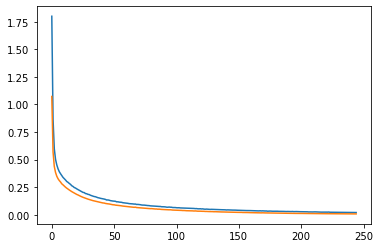

In [13]:

import matplotlib.pyplot as plt
num_epochs =245
plt.plot(range(num_epochs),losses_train,range(num_epochs),losses_valid)